In [2]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import re
from math import cos, sin, pi
import numpy as np
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 cos	 example_iterrows	 
get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 np	 os	 pd	 pi	 
pickle	 plt	 re	 save_dataframes	 sin	 store_objects	 sys	 


In [3]:

dataframes_dict = load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                  turnings_df='turnings_df')

Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\generations_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\generations_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\patriline_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\turnings_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\turnings_df.csv.


In [4]:

index_name = 'Patriarch Name'
patriline_df = dataframes_dict['patriline_df']
if 'Unnamed: 0' in patriline_df.columns:
    patriline_df = patriline_df.set_index('Unnamed: 0')
elif index_name in patriline_df.columns:
    patriline_df = patriline_df.set_index(index_name)
patriline_df.index.name = index_name

In [5]:

patriline_df.sample(5).T

Patriarch Name,"Joseph Robert Babbitt, Jr.","Elkanah Babbitt, II",David George Babbitt,Edward Bobet,Stephen Elkanah Babbitt
Year of Birth,1932,1690,1961,1626,1990
Year of Death,2002,1754,NaN,1675,NaN
Generation Name,Silent,Enlightenment,13th,Cavalier,Millennial
Date of Birth,6-Apr-32,"April 22, 1690",12-Jul-61,1626,5-Nov-90
Place of Birth,"Mesa, Maricopa County, Arizona, United States","Berkley, Bristol County, New Plymouth Colony","Flagstaff, AZ, United States",England,"Beverly, MA, United States"
Birth Longitude,33.3956,41.7558,35.1813,52.8204,42.5437
Birth Latitude,-111.808,-70.8068,-111.643,-4.57,-70.8628
Date of Death,"March 31, 2002 (69)","April 01, 1754 (63)",Not yet,"June 25, 1675 (49)",Not yet
Place of Death,"NM, United States (Multiple Myloma (Cancer))","Berkley, Bristol County, Province of Massachsutts",Not anywhere,"Berkley Bridge, Near Taunton, Plymouth Colony ...",Not anywhere
Death Longitude,35.6826,41.826,NaN,41.8334,NaN


In [6]:

index_name = 'generation_name'
generations_df = dataframes_dict['generations_df']
if 'Unnamed: 0' in generations_df.columns:
    generations_df = generations_df.set_index('Unnamed: 0')
elif index_name in generations_df.columns:
    generations_df = generations_df.set_index(index_name)
generations_df.index.name = index_name

In [7]:

generations_df.sample(5).T

generation_name,Progressive,Homeland,Reformation,Missionary,G.I.
childhood_turning_entered,4,4,1,1,3
saeculum_name,Civil War,Millennial,Reformation,Great Power,Great Power
turnings_archetype,Artist,Artist,Prophet,Prophet,Hero
generations_archetype,Adaptive,Adaptive,Idealist,Idealist,Civic
birth_year_begin,1843,2005,1483,1860,1901
birth_year_end,1859,NaN,1511,1882,1924
childhood_turning_description,American Civil War,"Great Recession, War on Terror, Climate Change...",Tudor Renaissance,"Reconstruction, Gilded Age","World War I, Prohibition, Roaring Twenties"
turning_year_begin,1860,2008,1497,1865,1908
turning_year_end,1865,NaN,1517,1886,1929


In [8]:

cmap_list = ['Reds', 'Purples', 'Greys', 'Blues', 'Greens', 'Oranges']
cmap_list.reverse()
saeculum_cmap_dict = {}
for saeculum, cmap_str in zip(patriline_df['Saeculum Name'].unique(), cmap_list):
    saeculum_cmap_dict[saeculum] = cmap_str
store_objects(saeculum_cmap_dict=saeculum_cmap_dict)

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\saeculum_cmap_dict.pickle


In [9]:

index_name = 'turning_name'
turnings_df = dataframes_dict['turnings_df']
if 'Unnamed: 0' in turnings_df.columns:
    turnings_df = turnings_df.set_index('Unnamed: 0')
elif index_name in turnings_df.columns:
    turnings_df = turnings_df.set_index(index_name)
turnings_df.index.name = index_name

In [10]:

turnings_df.sample(5).T

turning_name,The Long Boom & Culture Wars,French & Indian Wars,The Third Great Awakening,Merrie England,American Revolution
turning_number,3,3,2,1,4
turning_begin_year,1984,1746,1886,1594,1773
turning_end_year,2008,1773,1908,1621,1794
saeculum_name,Millennial,Revolutionary,Great Power,New World,Revolutionary
entering_elderhood,Silent,Enlighteners,Gilded,Reprisal,Awakeners
entering_midlife,Boomers,Awakeners,Progressives,Elizabethans,Liberty
entering_young_adulthood,Xers,Liberty,Missionaries,Parliamentarians,Republicans
entering_childhood,Millennials,Republicans,Lost,Puritans,Compromisers
turning_notes,"The Long Boom & Culture Wars (Third Turning, 1...","French & Indian Wars (Third Turning, 1746–1773...","The Third Great Awakening (Second Turning, 188...","Merrie England (First Turning, 1594–1621) was ...","American Revolution (Fourth Turning, 1773–1794..."


In [11]:

ccw_history_radius_dict = load_object('ccw_history_radius_dict')
cw_history_radius_dict = load_object('cw_history_radius_dict')
ccw_history_year_dict = load_object('ccw_history_year_dict')
cw_history_year_dict = load_object('cw_history_year_dict')
ccw_history_theta_dict = load_object('ccw_history_theta_dict')
cw_history_theta_dict = load_object('cw_history_theta_dict')

In [12]:

def polar_to_cartesian(r, theta):
    radians = theta*(pi/180)
    
    return int(r*cos(radians)), int(r*sin(radians))

In [13]:

def create_xy_list(history_radius_dict):
    xy_list = []
    for radius in sorted(history_radius_dict.keys()):
        year, theta = history_radius_dict[radius]
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [14]:

def get_one_arc(history_year_dict, start_year, stop_year, i=0):
    xy_list = []
    i = i % 4
    start_radius = history_year_dict[start_year][0]
    start_radius += 25*i
    stop_radius = history_year_dict[stop_year][0]
    stop_radius += 25*i
    increment_count = int(2*pi*start_radius)
    radius_array = np.linspace(start=start_radius, stop=stop_radius,
                               num=increment_count)
    start_theta = history_year_dict[start_year][1]
    stop_theta = history_year_dict[stop_year][1]
    theta_array = np.linspace(start=start_theta, stop=stop_theta,
                              num=increment_count)
    for radius, theta in zip(radius_array, theta_array):
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [15]:

def add_spiral_labels(years_list, history_year_dict, i=0):
    i = i % 4
    for year in years_list:
        radius, theta = history_year_dict[year]
        radius += 25*i
        radius -= 25/2
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, year, fontsize=12,
                            rotation=theta-90, rotation_mode='anchor')

In [16]:

from math import sqrt, atan

def label_arc(start_year, stop_year, history_year_dict, history_theta_dict, arc_label,
              ideal_distance=13, i=0):
    i = i % 4
    starting_year = int(((start_year + stop_year) / 2) - (len(arc_label) / 2))
    starting_radius, starting_theta = history_year_dict[starting_year]
    next_radius, next_theta = history_year_dict[starting_year+1]
    

    # Tan(A) = Opposite/Adjacent
    radians = atan(ideal_distance/starting_radius)
    theta_sign = np.sign(next_theta-starting_theta)
    theta_increment = theta_sign*(radians*180/pi)
    
    # Increment the theta so that it spaces the letters the same regardless of the radius
    theta = starting_theta
    radius = starting_radius + 25*i
    radius -= 25/2
    for c in arc_label[::int(-theta_sign)]:
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, c, fontsize=10,
                            rotation=theta-90, rotation_mode='anchor')
        theta += theta_increment
        if int(theta) in history_theta_dict:
            radius = history_theta_dict[int(theta)][1]
            radius += 25*i
            radius -= 25/2

In [17]:

def plot_patriarch(patriarch_name, history_year_dict):
    mask_series = (patriline_df.index == patriarch_name)
    start_year = int(patriline_df[mask_series]['Year of Birth'].tolist()[0])
    stop_year = patriline_df[mask_series]['Year of Death'].tolist()[0]
    try:
        stop_year = int(stop_year)
    except:
        stop_year = max(history_year_dict.keys())
    xy_list = get_one_arc(history_year_dict, start_year, stop_year)
    PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list], alpha=0.5)
    add_spiral_labels([start_year, stop_year], history_year_dict)

In [22]:

def show_babbitt_plot(history_year_dict, history_theta_dict):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, autoscale_on=False)
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)
    i = patriline_df.shape[0]-1
    d = 5
    previous_saeculum = patriline_df.head(1)['Saeculum Name'].tolist()[0]
    for patriarch_name, row_series in patriline_df.iterrows():
        start_year = int(row_series['Year of Birth'])
        stop_year = row_series['Year of Death']
        try:
            stop_year = int(stop_year)
        except:
            stop_year = start_year + 80
            if stop_year > max(history_year_dict.keys()):
                stop_year = max(history_year_dict.keys())
        xy_list = get_one_arc(history_year_dict, start_year, stop_year, i)
        add_spiral_labels([start_year, stop_year], history_year_dict, i)
        label_arc(start_year, stop_year, history_year_dict, history_theta_dict,
                  patriarch_name, 13, i)
        saeculum = row_series['Saeculum Name']
        if saeculum != previous_saeculum:
            previous_saeculum = saeculum
            d = 5
        #print(patriarch_name, i, d, saeculum)
        cmap = saeculum_cmap_dict[saeculum]
        c = plt.get_cmap(cmap)(np.linspace(0, 1, 6))[d]
        PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list],
                                      alpha=0.75, label=patriarch_name, c=c)
        i -= 1
        d -= 1
    Legend_obj = ax.legend()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

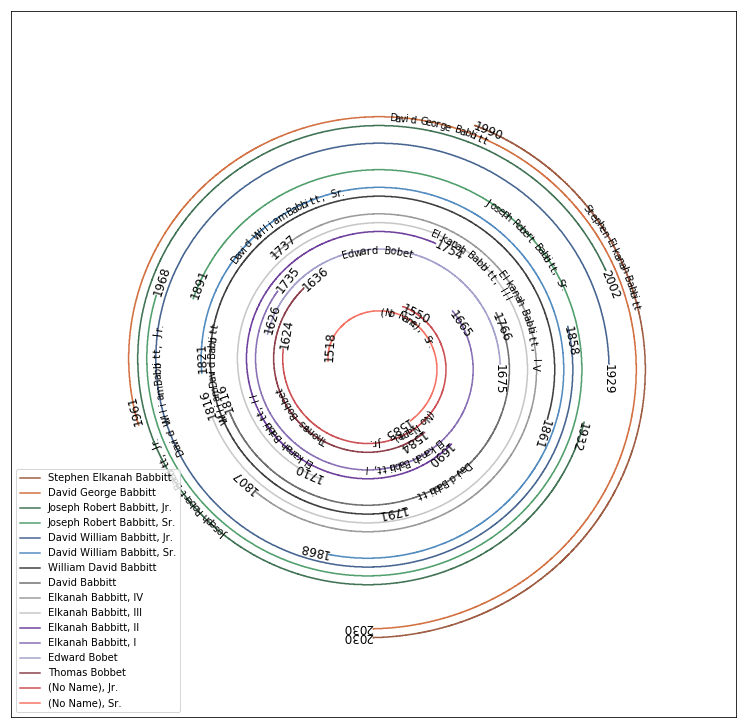

In [23]:

show_babbitt_plot(ccw_history_year_dict, ccw_history_theta_dict)

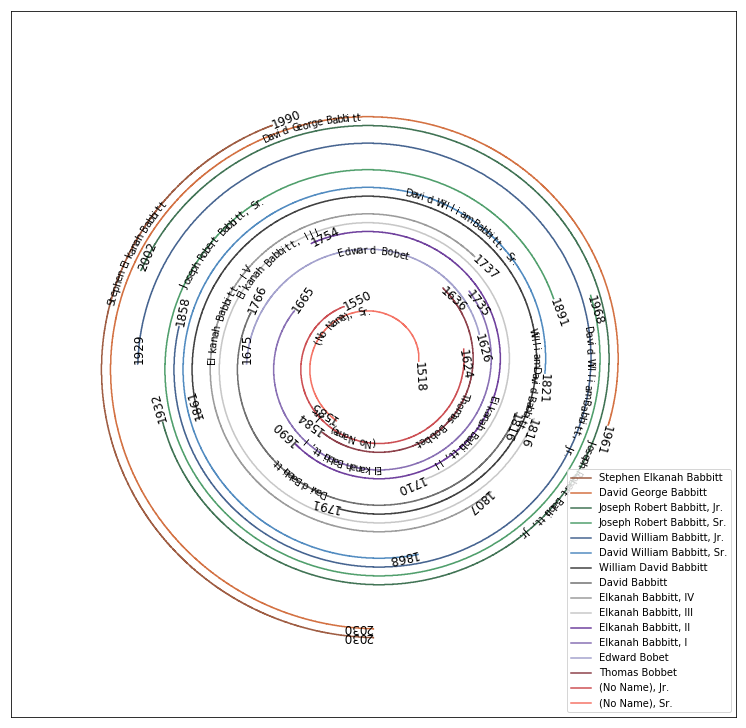

In [24]:

show_babbitt_plot(cw_history_year_dict, cw_history_theta_dict)

In [158]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [159]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))